![logos](https://img.freepik.com/free-vector/telemarketing-background-design_1212-238.jpg?size=338&ext=jpg)

In [1]:
#importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

**Dados utilizados**

Para o exempçlo de árvore de descisão iremo utilizar um [dataset de Marketing](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing). Ele demonstra valores de campanha de telemarketing de banco portugues. O objetivo e prever de cliente assinará um termo de deposito.

In [3]:
dados = pd.read_csv('bank-full_.csv', delimiter=';')
dados.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
dados.shape

(45211, 17)

![logos](https://mktes.files.wordpress.com/2014/09/curso-de-web-design-e28093-microcamp-curitiba-centro-aponta-as-vantagens-da-segmentac3a7c3a3o-de-mercado.jpg?)

Após a importação dos dados (.csv), iremos dividir o arquivo em 2 partes.<p>
    Pois assim, deixaremos um montante de registros para ser utilizado no modelo de **IA** após o término.<p>
        Ao todo temos 45211 registros, para o desenvolvimento da IA, usaremos 30000 e deixaremos o restante para a 2ª fase do processo
        

In [6]:
#vamos começar embaralhando o conjunto de dados, pois ele pode estar ordenado de alguma forma
dados = dados.sample(frac=1)

In [7]:
#1ª segmentação 
dados = dados.head(30000)
dados.shape

(30000, 17)

In [8]:
#2ª segmentação
df = dados.tail(25211)
df.shape

(25211, 17)

Usaremos para o desenvolvimento do modelo de **IA** o conjunto 'dados'<p>
    O dataframe 'df' será utilizado em 2º momento

![logos](http://emejr.com.br/wp-content/uploads/2018/05/analise-de-falha-640x320.jpg)

Como podemos perceber os dados estão distribuidos de varias maneiras, temos variaveis categoricas, representadas como objetos e variaveis numericas. Varios dados são desconhecidos, porém estão salvos como 'unknown'.

**análise exploratoria**

Antes de prevemos os valores vamos fazer uma análise exploratoria, vamos verificar qual idade e qual escolaridade tem maior chance de fechar o deposito.

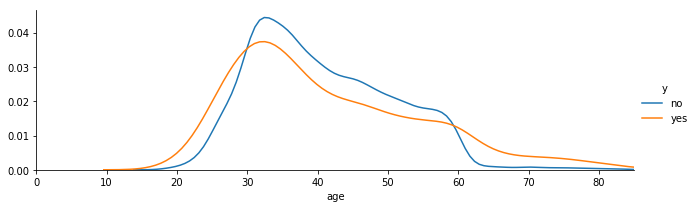

In [9]:
idade= sns.FacetGrid(dados, hue="y", aspect=3);
idade.map(sns.kdeplot, "age").add_legend();
idade.set(xlim=(0, 85));

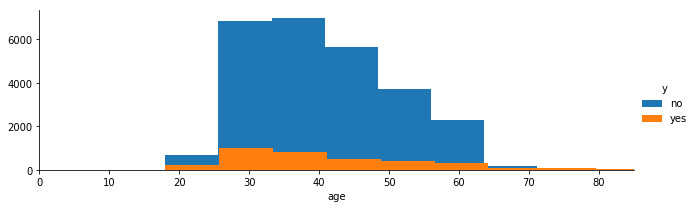

In [10]:
idade= sns.FacetGrid(dados, hue="y", aspect=3);
idade.map(plt.hist, "age").add_legend();
idade.set(xlim=(0, 85));

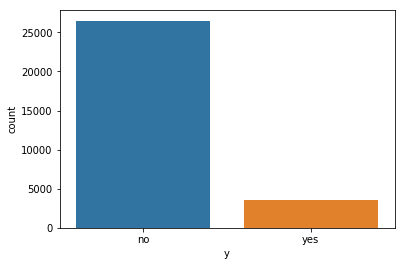

In [11]:
sns.countplot(dados['y'])

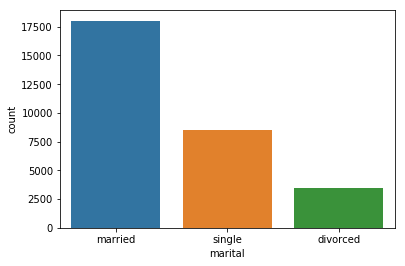

In [13]:
sns.countplot(dados['marital'])

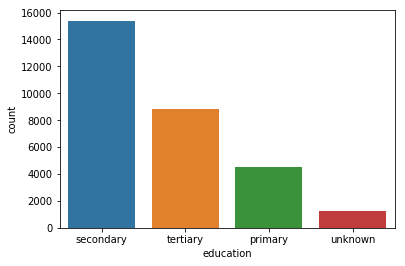

In [14]:
sns.countplot(dados['education'])

**Tratamento dos dados**

Porém para podermos utilizar os dados em algum algoritmo de aprendizado  precisamos que todos os valores sejam numericos, assim precisamos converter as colunas que são object.

Existem maneiras de fazermos isto com o sklearn ou com o pandas.
Vamos mostrar as duas:

- **Pandas:** Com o pandas convertemos a coluna para category, apos isto podemos fazer a função cat.codes. 
- **Sklearn:** Temos que utilizar a classe LabelEnconder, ela funciona como a classe de normalização.

In [15]:
education = dados['education']

In [16]:
education.head()

17918    secondary
5918      tertiary
586      secondary
29065    secondary
4731     secondary
Name: education, dtype: object

In [17]:
#Pandas
#Convertendo os dados para categorico
educationConv = education.astype('category')

# pegando o valores de cada categoria
educationConv = educationConv.cat.codes
educationConv[:5]

17918    1
5918     2
586      1
29065    1
4731     1
dtype: int8

In [18]:
education.head()

17918    secondary
5918      tertiary
586      secondary
29065    secondary
4731     secondary
Name: education, dtype: object

In [19]:
#Sklearn
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
educationConv2 = label.fit_transform(education)
educationConv2[:5]

array([1, 2, 1, 1, 1])

Agora vamos usar um loop para podermos fazer a conversão de todos os dados do dataframe 

In [20]:
for coluna in dados:
    if dados[coluna].dtype == object:
        dados[coluna] = dados[coluna].astype('category').cat.codes

Nota-se como o dataframe ficou após a conversão dos **dados** !

In [21]:
dados.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
17918,39,9,1,1,0,-1451,1,1,0,30,5,65,5,-1,0,3,0
5918,54,9,1,2,0,-800,1,0,2,26,8,445,2,-1,0,3,0
586,55,1,1,1,0,840,1,0,2,6,8,310,2,-1,0,3,0
29065,34,1,1,1,0,-271,1,1,0,2,3,90,1,252,2,0,0
4731,30,7,2,1,0,432,1,0,2,20,8,340,3,-1,0,3,0


**Separando dados**

Com os dados convertidos vamos separa X e y, e em treino e teste.

In [22]:
dadosY1 = dados[dados['y']== 1]
dadosY2 = dados[dados['y']== 0]

In [23]:
dadosY2 = dadosY2.sample(len(dadosY1))

In [24]:
dados2 = pd.concat([dadosY1,dadosY2])

In [25]:
y = dados.y
x = dados.drop('y',axis=1) 

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
#Optamos por destinar 30% dos dados para treino
np.random.seed(100)
xTreino,xTeste,yTreino,yTeste = train_test_split(x,y, test_size=0.3)

### Utilizando árvore de descisão

Agora vamos criar um modelo de descisão como a arvoré de descisão

![logos](https://camo.githubusercontent.com/48f1f5cd2785d7bba6324355c0e5e1de2bfa82d5/68747470733a2f2f696d6167652e6962622e636f2f634d6157677a2f53637265656e73686f745f66726f6d5f323031385f31305f30365f30315f31305f35332e706e67)

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
#Criando modelo de classificação
tree = DecisionTreeClassifier(criterion='entropy')

#Treinando modelo
tree.fit(xTreino,yTreino)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [30]:
#Predizendo dados 
preditos = tree.predict(xTeste)

#Verificando modelo
from sklearn.metrics import classification_report
print(classification_report(preditos,yTeste))

             precision    recall  f1-score   support

          0       0.93      0.93      0.93      7967
          1       0.46      0.47      0.46      1033

avg / total       0.88      0.88      0.88      9000



In [31]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

confusion_matrix(preditos, yTeste)

array([[7393,  574],
       [ 550,  483]])

In [32]:
preditos = tree.predict_proba(xTeste)
preditos

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

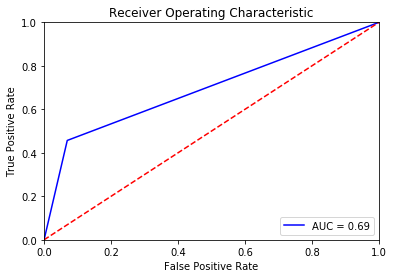

In [33]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = tree.predict_proba(xTeste)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(yTeste, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [34]:
print ("\nAcurácia de classificação = "+str(100*roc_auc)+"%\n")


Acurácia de classificação = 69.38551417258563%



![logos](https://cdn4.iconfinder.com/data/icons/robotics-and-artificial-intelligence/512/2-512.png)

Agora abordaremos a 2ª parte do conjunto de dados separada lá no começo<p>
    Chamamos de "**df**"<p>
        Realizaremos todo o tratamento de dados novamente para os mesmos<p>
            Porém antes realizaremos uma análise dos dados

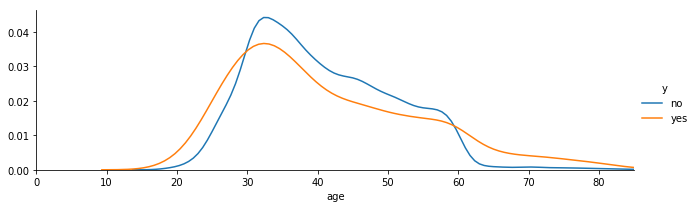

In [35]:
idade= sns.FacetGrid(df, hue="y", aspect=3);
idade.map(sns.kdeplot, "age").add_legend();
idade.set(xlim=(0, 85));

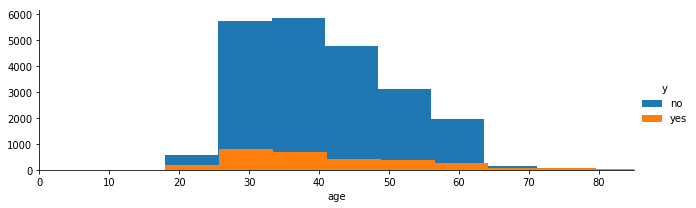

In [36]:
idade= sns.FacetGrid(df, hue="y", aspect=3);
idade.map(plt.hist, "age").add_legend();
idade.set(xlim=(0, 85));

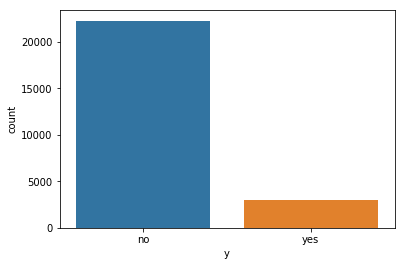

In [39]:
sns.countplot(df['y'])

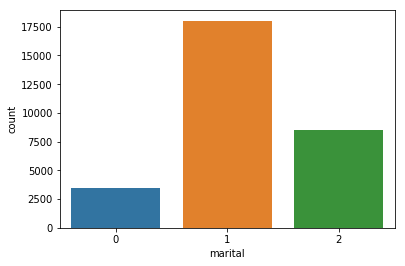

In [41]:
sns.countplot(dados['marital'])

**Tratamento dos Dados**

In [38]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
31435,32,management,single,tertiary,no,1613,no,no,cellular,30,mar,253,2,129,5,failure,no
13043,35,entrepreneur,married,primary,no,2643,no,yes,cellular,8,jul,259,1,-1,0,unknown,no
6681,33,technician,married,tertiary,no,525,yes,yes,unknown,28,may,139,1,-1,0,unknown,no
25765,52,blue-collar,married,secondary,no,7225,no,no,cellular,19,nov,205,2,113,2,failure,no
33190,57,retired,married,primary,no,-384,yes,yes,telephone,20,apr,534,1,-1,0,unknown,no


In [42]:
education = df['education']

In [43]:
education.head()

31435     tertiary
13043      primary
6681      tertiary
25765    secondary
33190      primary
Name: education, dtype: object

In [44]:
#dessa vez usaremos somente o Sklearn
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
educationConv2 = label.fit_transform(education)
educationConv2[:5]

array([2, 0, 2, 1, 0])

Agora vamos usar um loop para podermos fazer a conversão de todos os dados do dataframe 

In [45]:
for coluna in df:
    if df[coluna].dtype == object:
        df[coluna] = df[coluna].astype('category').cat.codes

Nota-se como o dataframe ficou após a conversão dos **dados** !

In [46]:
df.shape

(25211, 17)

In [47]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
31435,32,4,2,2,0,1613,0,0,0,30,7,253,2,129,5,0,0
13043,35,2,1,0,0,2643,0,1,0,8,5,259,1,-1,0,3,0
6681,33,9,1,2,0,525,1,1,2,28,8,139,1,-1,0,3,0
25765,52,1,1,1,0,7225,0,0,0,19,9,205,2,113,2,0,0
33190,57,5,1,0,0,-384,1,1,1,20,0,534,1,-1,0,3,0
